<a href="https://colab.research.google.com/github/aenako/Mudah.my/blob/main/Group_Project_DS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GROUP DS5**<BR>
**LUQMAN AMZARI BIN ANIS HILMI**<BR>
**DANISH DEAN BIN NOOR SALLAHUDDIN**<BR>
**AINA NASUHA BINTI ISMAIL ZAKRI**<BR>
**NUR IZZATI BINTI RASMAN**


### **EXTRACTING DATA ATTRIBUTES**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of URLs to scrape
urls = [
    'https://www.mudah.my/malaysia/cars-for-sale?page=1',
    'https://www.mudah.my/malaysia/cars-for-sale?page=2',
    'https://www.mudah.my/malaysia/cars-for-sale?page=3'
]

# Headers to mimic a real browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36'
}

# Lists to store scraped data
product_names = []
manufacturing_years = []
prices = []
times_dates = []
conditions = []
regions = []
mileages = []
engine_capacities = []

# Loop through each page
for url in urls:
    # Send HTTP GET request
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract all product listings
    listings = soup.find_all('div', {'data-testid': lambda x: x and x.startswith('listing-ad-item')})

    for listing in listings:
        # Extract product name
        product_name = listing.find('div', {'class': 'flex flex-col'})  # Assuming car name is in <h2>
        product_names.append(product_name.text.strip() if product_name else "N/A")

        # Manufacturing Year
        year = listing.find('div', {'class': 'rounded flex items-center gap-1 py-0.5 pr-1 pl-0.5 w-max'})
        if not year:
           year = listing.find('div', {'title': 'Manufactured Year'})
        manufacturing_years.append(year.text.strip() if year else "N/A")


        # Extract price
        price = listing.find('div', {'class': 'text-sm text-[#E21E30] font-bold'})  # Replace with actual class
        prices.append(price.text.strip() if price else "N/A")

        # Extract time & date posted
        time_date = listing.find('span', string=True)
        times_dates.append(time_date.text.strip() if time_date else "N/A")

        # Extract condition (New/Used)
        condition = listing.find('div', {'title': 'Condition'})
        conditions.append(condition.text.strip() if condition else "N/A")

        # Extract region
        region = listing.find('span', {'title': 'Region'})
        regions.append(region.text.strip() if region else "N/A")

        # Extract mileage
        mileage = listing.find('div', {'title': 'Mileage'})  # Replace with actual class
        mileages.append(mileage.text.strip() if mileage else "N/A")

        # Extract engine capacity
        engine_capacity = listing.find('div', {'title': 'Engine capacity'})  # Replace with actual class
        engine_capacities.append(engine_capacity.text.strip() if engine_capacity else "N/A")

# Create a DataFrame with the extracted data
df = pd.DataFrame({
    "Product Name": product_names,
    "Manufacturing Year": manufacturing_years,
    "Price": prices,
    "Time & Date Posted": times_dates,
    "Condition": conditions,
    "Region": regions,
    "Mileage": mileages,
    "Engine Capacity (cc)": engine_capacities
})

# Save the DataFrame to a CSV file
df.to_csv('mudah_raw.csv', index=False)

# Display the DataFrame
print("DataFrame saved to 'mudah_raw.csv'")

# Display the DataFrame
print("DataFrame:")
df

DataFrame saved to 'mudah_raw.csv'
DataFrame:


,Product Name,Manufacturing Year,Price,Time & Date Posted,Condition,Region,Mileage,Engine Capacity (cc)
0,Proton PREVE 1.6 CFE TURBO LOTUS 400 ONLY INST...,2018,"RM 29,800","Today, 18:18",Used,Selangor,65000 - 69999,1561cc
1,Mitsubishi Triton AUTO 4X4 Baru 184PS DISKAUN ...,2024,"RM 116,980","Today, 18:17",New,Kuala Lumpur,0 - 4999,2442cc
2,Toyota VIOS 1.5 J (A) FREE WARRANTY ONE OWNERR...,2016,"RM 31,888","Today, 18:17",Used,Selangor,85000 - 89999,1497cc
3,Mazda CX-5 2.0 GL 2WD (A) WARRANTY 75K KM FSRR...,2017,"RM 52,888","Today, 18:17",Used,Selangor,70000 - 74999,1998cc
4,Honda ACCORD 2.4 VTi-L LED LAMP 2Y WARRANTYRM ...,2014,"RM 27,888","Today, 18:17",Used,Selangor,65000 - 69999,2356cc
...,...,...,...,...,...,...,...,...
115,"Porsche 911 Carrera S 2023 (HOT UNIT)RM 998,999",2023,"RM 998,999","Today, 18:09",Recon,Selangor,5000 - 9999,2981cc
116,Mitsubishi TRITON 2.4 VGT ADVENTURE(A)PADDLE S...,2016,"RM 59,800","Today, 18:09",Used,Johor,70000 - 74999,2442cc
117,Naza FORTE 1.6 SX ENHANCED (A)CASH NEGO GORM 1...,2013,"RM 13,800","Today, 18:09",Used,Selangor,100000 - 109999,1591cc
118,"PROTON SAGA 1.3 (M) tip top conditionRM 9,800",2014,"RM 9,800","Today, 18:08",Used,Perak,150000 - 159999,1332cc


### **DATA TRANSFORMATION**

**a. DATA PREPROCESSING**

In [ ]:
import pandas as pd
import re

# Load dataset
file_path = "mudah_raw.csv"
df = pd.read_csv(file_path)

# 1. Convert Price to Numeric Format
df["Price"] = df["Price"].str.replace("RM", "").str.replace(",", "").astype(int)

# 2. Extract Numeric Values from Engine Capacity
df["Engine Capacity (cc)"] = df["Engine Capacity (cc)"].str.replace("cc", "").astype(int)

# 3. Standardize Product Name (Remove extra spaces, capitalize each word, and remove unwanted words)
unwanted_words = ["rm", "(A)", "(M)", "New", "Used", "Recon", "Warranty", "promotion", "sale", "warranty", "mileage", "kit", "stock", "seat", "offer", "year end sales", "facelift"]
df["Product Name"] = df["Product Name"].str.strip().apply(lambda x: ' '.join([word.capitalize() for word in x.split() if word not in unwanted_words]))

# 4. Handle Missing Values
df["Price"] = df["Price"].fillna(df["Price"].mean())
df["Engine Capacity (cc)"] = df["Engine Capacity (cc)"].fillna(df["Engine Capacity (cc)"].mean())
df["Manufacturing Year"] = df["Manufacturing Year"].fillna(df["Manufacturing Year"].mode()[0])  # Fill with mode for categorical
df["Mileage"] = df["Mileage"].fillna("Unknown")  # Fill missing mileage with a placeholder

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Apply the function to the Price and Engine Capacity columns
df = remove_outliers_iqr(df, "Price")
df = remove_outliers_iqr(df, "Engine Capacity (cc)")

# Save processed dataset
df.to_csv("mudah_processed.csv", index=False)

# Display processed data
print(df.head())

                                        Product Name  Manufacturing Year  \
0  Proton Preve 1.6 Cfe Turbo Lotus 400 Only Inst...                2018   
1  Mitsubishi Triton Auto 4x4 Baru 184ps Diskaun ...                2024   
2  Toyota Vios 1.5 J Free Warranty One Ownerrm 31...                2016   
3  Mazda Cx-5 2.0 Gl 2wd Warranty 75k Km Fsrrm 52...                2017   
4  Honda Accord 2.4 Vti-l Led Lamp 2y Warrantyrm ...                2014   

    Price Time & Date Posted Condition        Region        Mileage  \
0   29800       Today, 18:18      Used      Selangor  65000 - 69999   
1  116980       Today, 18:17       New  Kuala Lumpur       0 - 4999   
2   31888       Today, 18:17      Used      Selangor  85000 - 89999   
3   52888       Today, 18:17      Used      Selangor  70000 - 74999   
4   27888       Today, 18:17      Used      Selangor  65000 - 69999   

   Engine Capacity (cc)  
0                  1561  
1                  2442  
2                  1497  
3           

**b. DATA VISUALISATION**

Data Visualisation Before Data Cleaning

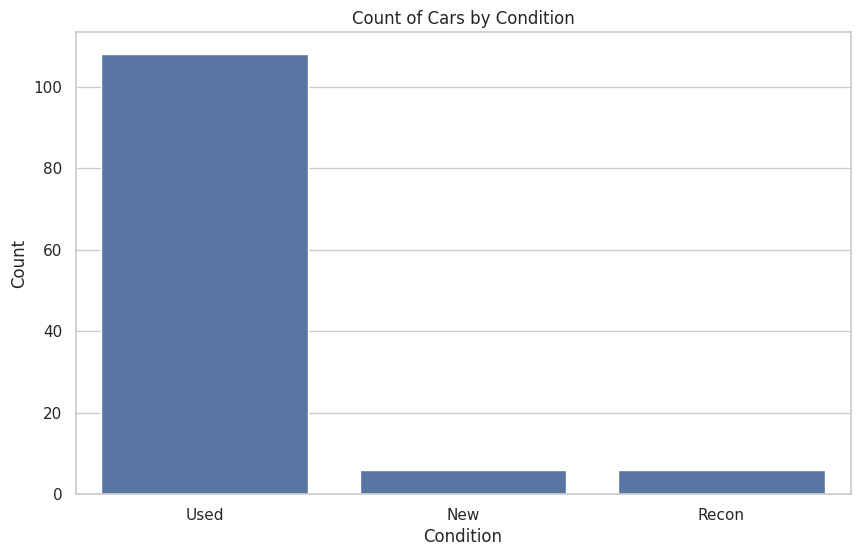

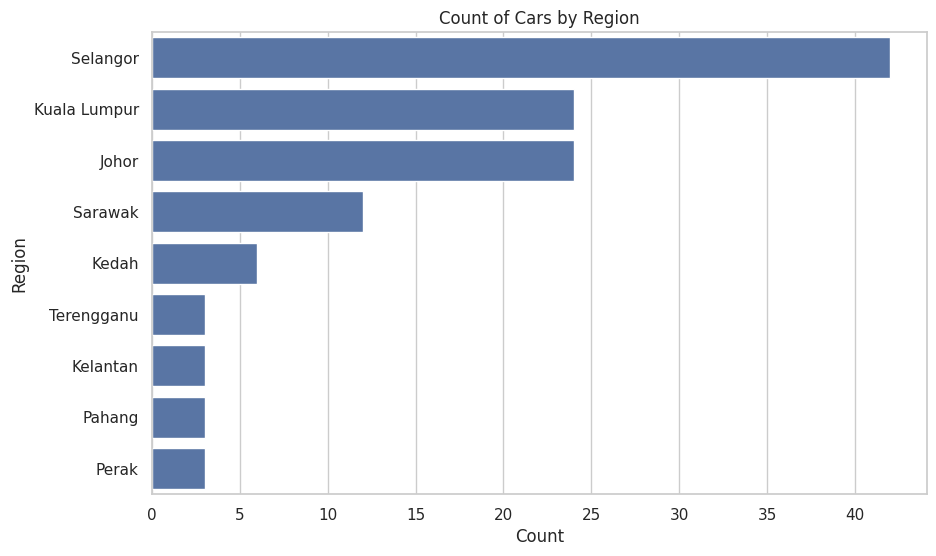

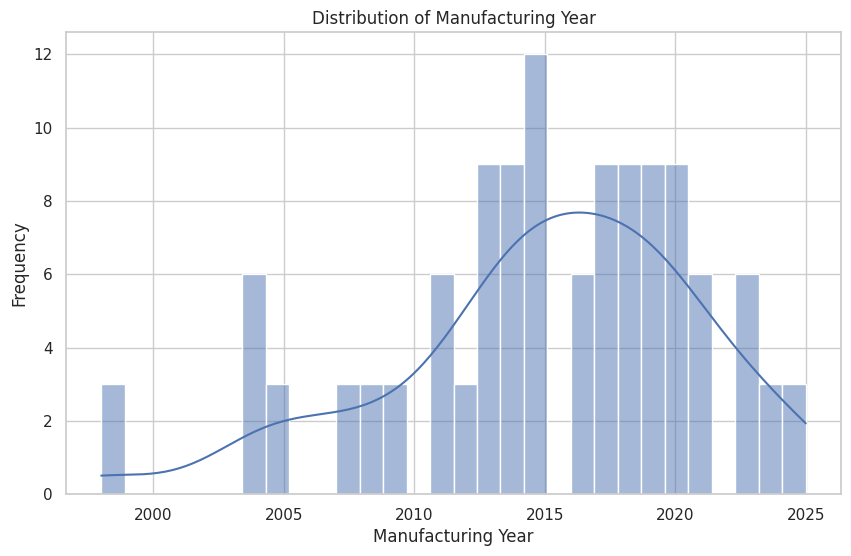

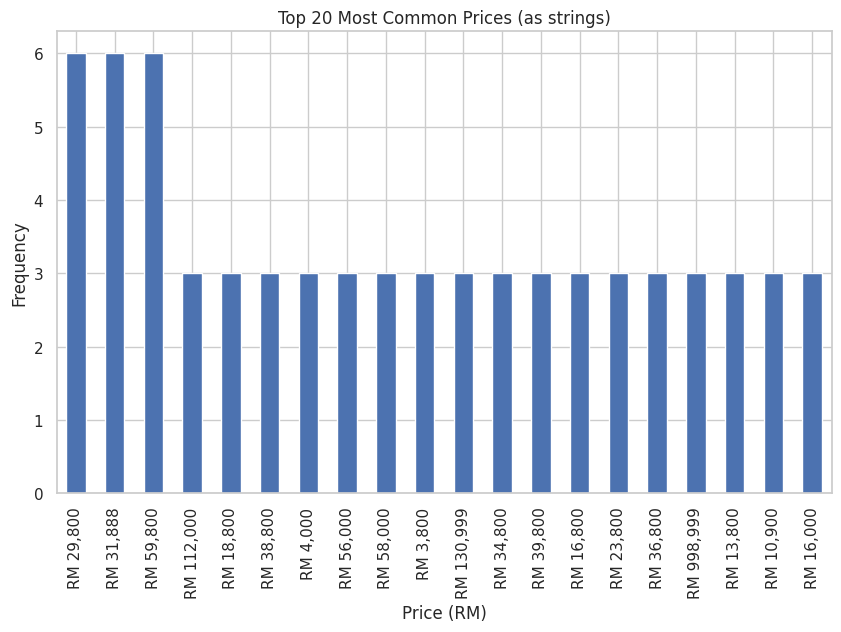

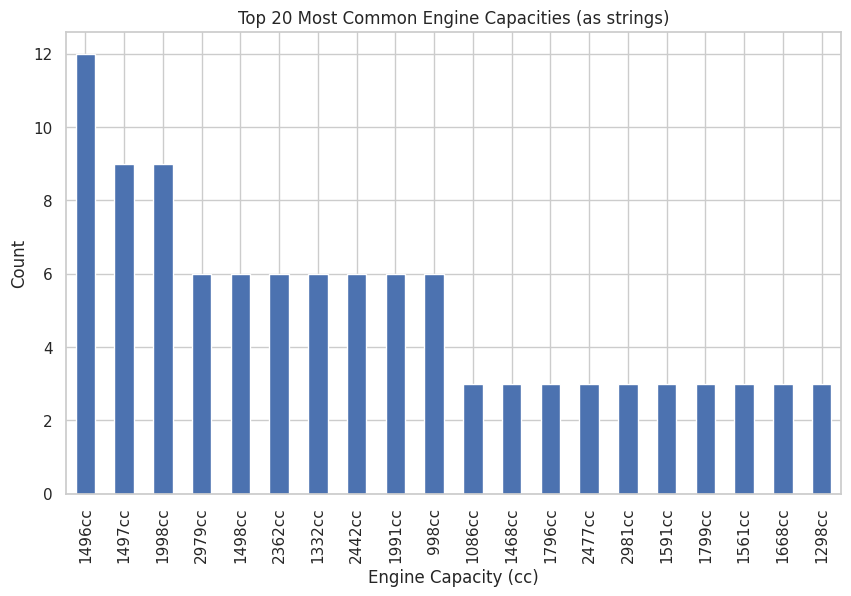

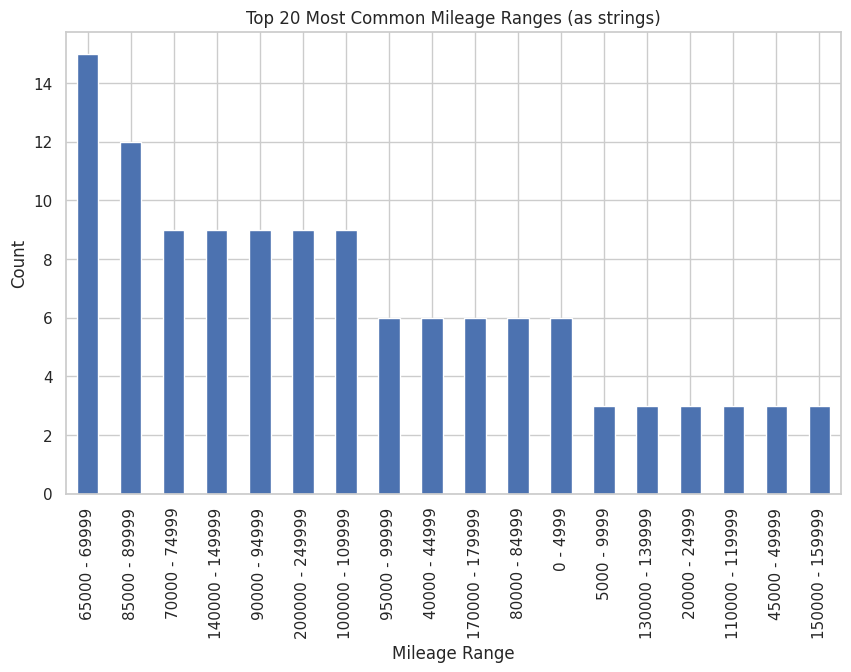

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('mudah_raw.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Count of Cars by Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Condition', data=df, order=df['Condition'].value_counts().index)
plt.title('Count of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# 2. Count of Cars by Region
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index)
plt.title('Count of Cars by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# 3. Distribution of Manufacturing Year
plt.figure(figsize=(10, 6))
sns.histplot(df['Manufacturing Year'], bins=30, kde=True)
plt.title('Distribution of Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Frequency')
plt.show()

# 4. Price Distribution (as strings, not numeric)
# Since Price is not cleaned, we can't plot it directly as a histogram.
# Instead, we can count the frequency of each unique price string.
plt.figure(figsize=(10, 6))
df['Price'].value_counts().head(20).plot(kind='bar')  # Plot top 20 most common prices
plt.title('Top 20 Most Common Prices (as strings)')
plt.xlabel('Price (RM)')
plt.ylabel('Frequency')
plt.show()

# 5. Count of Cars by Engine Capacity (as strings)
plt.figure(figsize=(10, 6))
df['Engine Capacity (cc)'].value_counts().head(20).plot(kind='bar')  # Plot top 20 most common engine capacities
plt.title('Top 20 Most Common Engine Capacities (as strings)')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Count')
plt.show()

# 6. Count of Cars by Mileage (as strings)
plt.figure(figsize=(10, 6))
df['Mileage'].value_counts().head(20).plot(kind='bar')  # Plot top 20 most common mileage ranges
plt.title('Top 20 Most Common Mileage Ranges (as strings)')
plt.xlabel('Mileage Range')
plt.ylabel('Count')
plt.show()

Data Visualisation After Data Cleaning

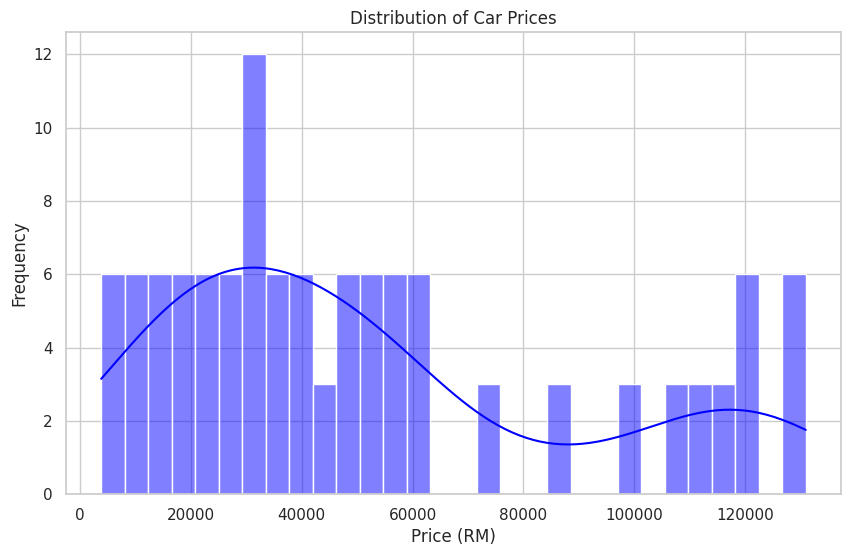

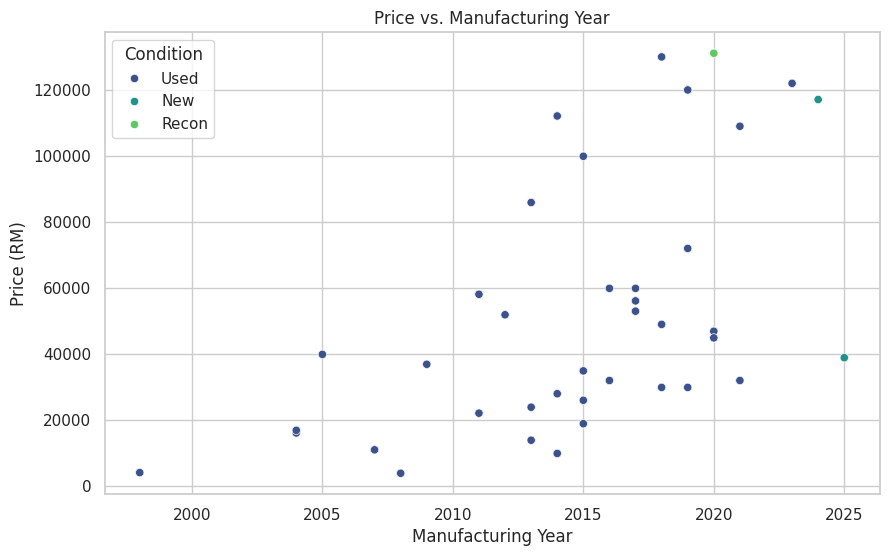

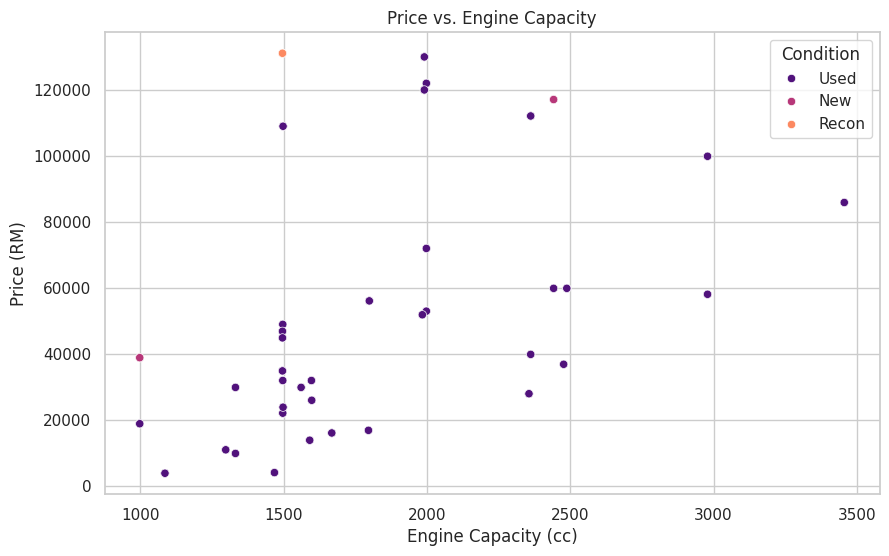

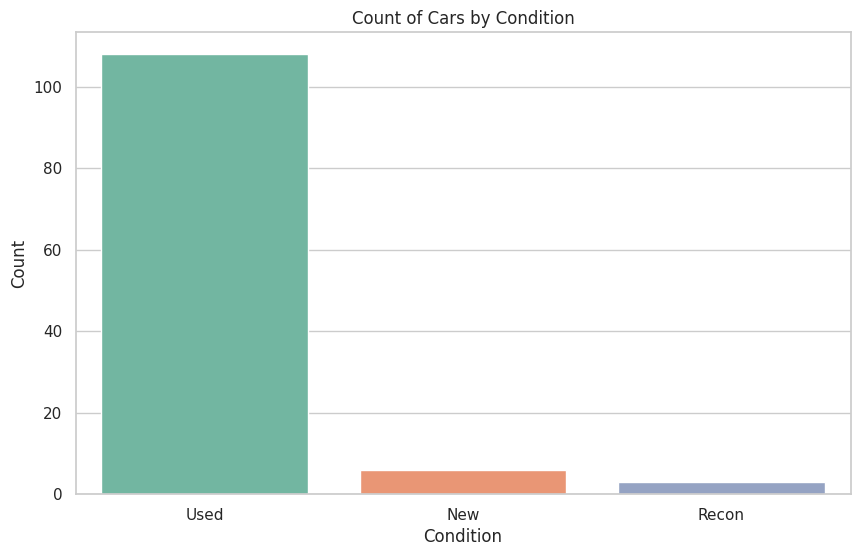

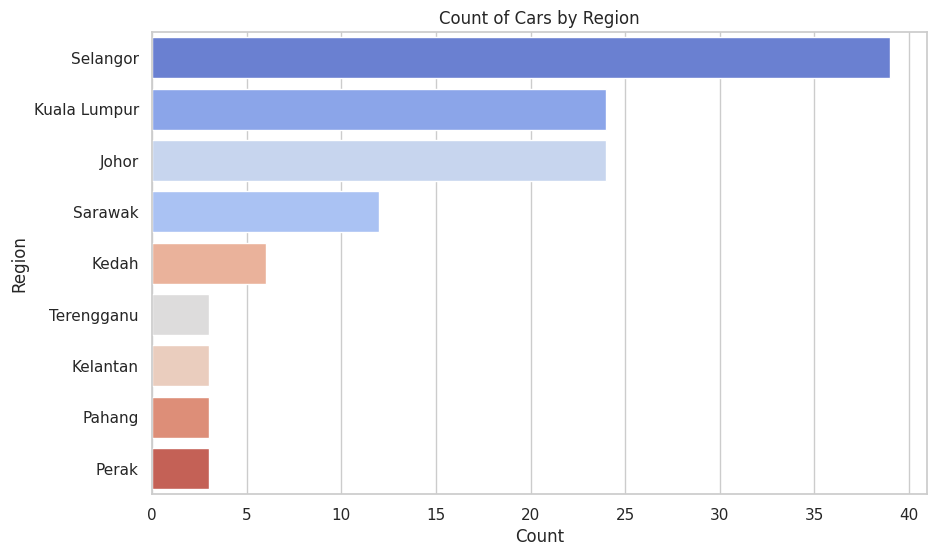

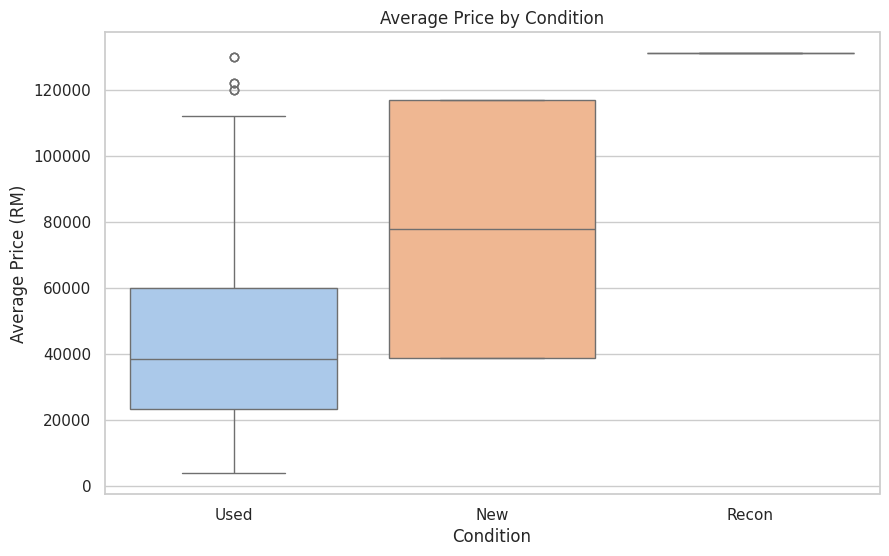

<ipython-input-4-e7f39cc391de>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price', data=df, palette='pastel')


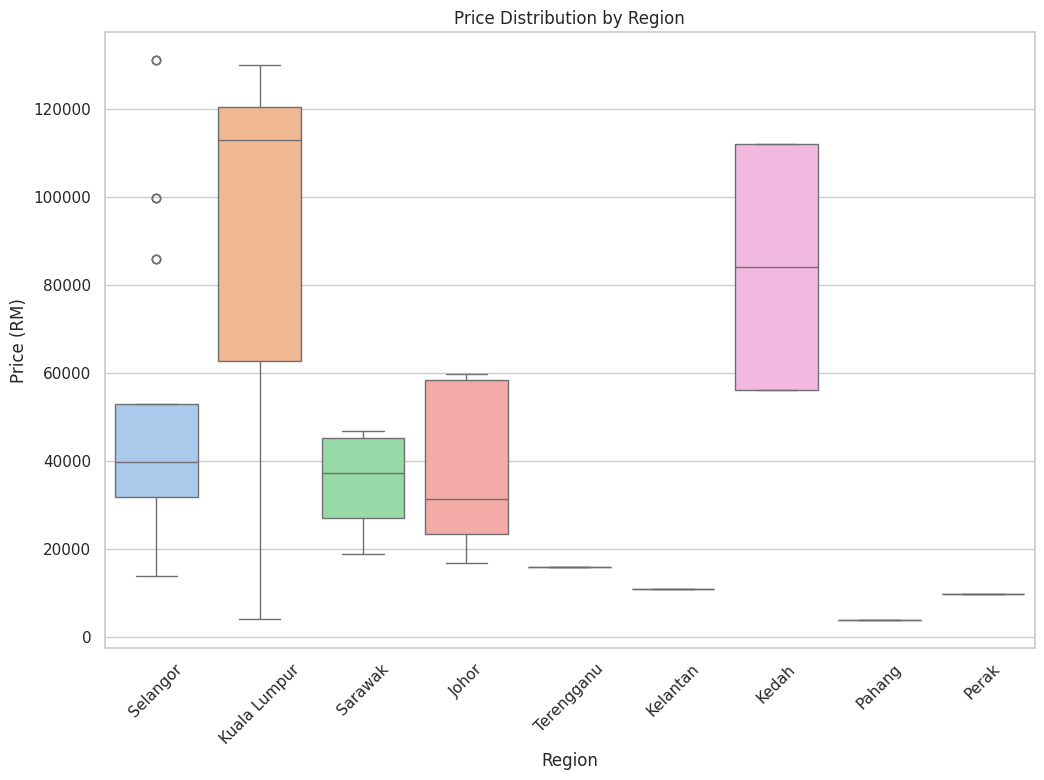

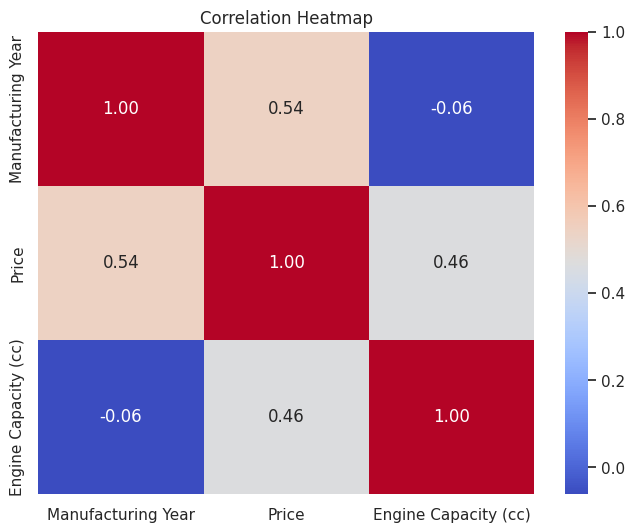

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('mudah_processed.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (RM)')
plt.ylabel('Frequency')
plt.show()

# 2. Price vs. Manufacturing Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Manufacturing Year', y='Price', data=df, hue='Condition', palette='viridis')
plt.title('Price vs. Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (RM)')
plt.show()

# 3. Price vs. Engine Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Capacity (cc)', y='Price', data=df, hue='Condition', palette='magma')
plt.title('Price vs. Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price (RM)')
plt.show()

# 4. Count of Cars by Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Condition', data=df, order=df['Condition'].value_counts().index, hue='Condition', palette='Set2', legend=False)
plt.title('Count of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# 5. Count of Cars by Region
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index, hue='Region', palette='coolwarm', legend=False)
plt.title('Count of Cars by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# 6. Average Price by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Price', data=df, hue='Condition', palette='pastel', legend=False)
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price (RM)')
plt.show()

# 7. Price Distribution by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Price', data=df, palette='pastel')
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price (RM)')
plt.xticks(rotation=45)
plt.show()

# 8. Correlation Heatmap (Numeric Columns)
plt.figure(figsize=(8, 6))
numeric_df = df[['Manufacturing Year', 'Price', 'Engine Capacity (cc)']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **LOAD CLEANED DATA**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('mudah_processed.csv')

# Display the first few rows
print(df.head())


                                        Product Name  Manufacturing Year  \
0  Toyota Noah 2.0 Si Wxb 2 Promosi Akhir Tahunrm...                2020   
1  Honda Hr-v 1.8 E Facelift P/shift Fsr57k U/wrt...                2021   
2  M Benz Cla180 1.6 Amg C117 F/lift Cbu Japan Re...                2016   
3     Honda Civic 1.5 Turbo Fl1 Auto Murahrm 161,000                2021   
4              Proton Saga 1.3 Base Line (a)rm 6,800                2008   

    Price Time & Date Posted Condition        Region          Mileage  \
0  139000       Today, 17:36     Recon  Kuala Lumpur    50000 - 54999   
1   80800       Today, 17:36      Used      Selangor    55000 - 59999   
2  109800       Today, 17:36      Used      Selangor    80000 - 84999   
3  161000       Today, 17:36     Recon  Kuala Lumpur      5000 - 9999   
4    6800       Today, 17:35      Used      Selangor  150000 - 159999   

   Engine Capacity (cc)  
0                  1986  
1                  1799  
2                  1595  
